In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_parquet('data/perv1.parquet')
df.head()

stratum  \
year_quarter visit sector fsu   sample_sg_sb_number second_stage_stratum_number sample_household_number person_serial_number           
Q1           V1    rural  10002 1                   1                           01                      01                        01   
                                                                                                        02                        01   
                                                                                                        03                        01   
                                                                                                        04                        01   
                                                                                                        05                        01   

                                                                                                                             sub_stratum  \
year_quarter visit sector fsu   sample_sg_sb_number second_stage_stratum_number sample_household_number person_serial_number               
Q1           V1    rural  10002 1                   1                           01                      01                            14   
                                                                                                        02                            14   
                                                                                                        03                            14   
                                                                                                        04                            14   
                                                                                                        05                            14   

                                                                                                                             sub_sample  \
year_quarter visit sector fsu   sample_sg_sb_number second_stage_stratum_number sample_household_number person_serial_number              
Q1           V1    rural  10002 1                   1                           01                      01                            1   
                                                                                                        02                            1   
                                                                                                        03                            1   
                                                                                                        04                            1   
                                                                                                        05                            1   

                                                                                                                             fod_sub_region  \
year_quarter visit sector fsu   sample_sg_sb_number second_stage_stratum_number sample_household_number person_serial_number                  
Q1           V1    rural  10002 1                   1                           01                      01                             0213   
                                                                                                        02                             0213   
                                                                                                        03                             0213   
                                                                                                        04                             0213   
                                                                                                        05                             0213   

                                                                                                                              ns_count_sector_stratum_substratum_subsample  \
year_quarter visit sector fsu   sample_sg

In [2]:
import yaml
with open('../plfs/perv1.map.yaml', 'r') as fin:
    schema = yaml.safe_load(fin)

In [18]:
status_code = schema['b5pt1q3_perv1']['categories']
status_code = {k: v for v, k in status_code.items()}
pact = df['usual_principal_activity_status'].map(status_code).astype(int)
sact = df['subsidiary_work_status'].map(status_code).fillna(0).astype(int)
emp_codes = [11, 12, 21, 31, 41, 51]
unemp_code = 81

df['principal_employed'] = df['subsidiary_employed'] = False
df['principal_unemployed'] = df['subsidiary_unemployed'] = False

df.loc[sact.isin(emp_codes), 'subsidiary_employed'] = True
df.loc[sact == unemp_code, 'subsidiary_unemployed'] = True

df.loc[pact.isin(emp_codes), 'principal_employed'] = True
df.loc[pact == unemp_code, 'principal_unemployed'] = True

df['broad_status'] = 'not in workforce'
df.loc[df['principal_employed'] | df['subsidiary_employed'], 'broad_status'] = 'employed'
df.loc[df['principal_unemployed'] & (df['has_subsidiary_work'] == 'no'), 'broad_status'] = 'unemployed'


In [20]:
lpfr = df[df['age'] >= 15]
x = lpfr.groupby('broad_status')['subsample_multiplier'].sum() / lpfr['subsample_multiplier'].sum()
x['employed'] + x['unemployed']

0.6013331190760013

In [46]:
df['weekly_earning'] = df['weekly_salaried_earnings'] + df['weekly_self_employed_earnings']
workforce = df[df['broad_status'].isin(['employed', 'unemployed'])]

In [51]:
MULT = 'subsample_multiplier'
workforce.groupby('general_education').apply(lambda x: (x['weekly_earning'] * x[MULT]).sum() / x[MULT].sum()).sort_values()

general_education
others                                                -38.706371
postgraduate and above                                 -3.167754
graduate                                                5.968862
diploma/certificate course                              8.645419
not literate                                           15.238974
primary                                                15.492442
secondary                                              18.036045
higher secondary                                       20.651369
below primary                                          24.827156
literate without formal schooling : EGS/ NFEC/ AEC     25.970095
middle                                                 31.510486
literate without formal schooling: TLC                420.995791
dtype: float64

In [55]:
workforce.groupby('general_education').apply(lambda x: (x['weekly_salaried_earnings'] * x[MULT]).sum() / x[MULT].sum()).sort_values()

general_education
others                                                -42.423897
postgraduate and above                                 -3.462769
graduate                                               -1.290553
not literate                                            2.141317
primary                                                 2.209991
below primary                                           2.433527
secondary                                               3.355498
diploma/certificate course                              4.661760
middle                                                  5.905191
higher secondary                                        8.904923
literate without formal schooling : EGS/ NFEC/ AEC     15.901923
literate without formal schooling: TLC                348.850484
dtype: float64

In [57]:
workforce.groupby('general_education').apply(lambda x: (x['weekly_self_employed_earnings'] * x[MULT]).sum() / x[MULT].sum()).sort_values()

general_education
postgraduate and above                                 0.295015
others                                                 3.717527
diploma/certificate course                             3.983659
graduate                                               7.259415
literate without formal schooling : EGS/ NFEC/ AEC    10.068172
higher secondary                                      11.746446
not literate                                          13.097657
primary                                               13.282451
secondary                                             14.680547
below primary                                         22.393630
middle                                                25.605294
literate without formal schooling: TLC                72.145307
dtype: float64

In [36]:
df[['n_years_formal_education', 'avg_wage']]

n_years_formal_education  \
year_quarter visit sector fsu   sample_sg_sb_number second_stage_stratum_number sample_household_number person_serial_number                             
Q1           V1    rural  10002 1                   1                           01                      01                                          10   
                                                                                                        02                                           6   
                                                                                                        03                                          10   
                                                                                                        04                                          10   
                                                                                                        05                                           9   
...                                                                                                                                                ...   
Q4           V1    urban  26235 1                   3                           01                      01                                          17   
                                                                                02                      01                                          15   
                                                    4                           01                      01                                          12   
                                                                                02                      01                                          17   
                                                                                                        02                                          16   

                                                                                                                              avg_wage  
year_quarter visit sector fsu   sample_sg_sb_number second_stage_stratum_number sample_household_number person_serial_number            
Q1           V1    rural  10002 1                   1                           01                      01                           0  
                                                                                                        02                           0  
                                                                                                        03                           0  
                                                                                                        04                           0  
                                                                                                        05                           0  
...                                                                                                                                ...  
Q4           V1    urban  26235 1                   3                           01                      01                           0  
                                                                                02                      01                           0  
                                                    4                           01                      01                           0  
                                                                                02                      01                           0  
                                                                                                        02                           0  

[418159 rows x 2 columns]

<AxesSubplot:xlabel='n_years_formal_education', ylabel='avg_wage'>

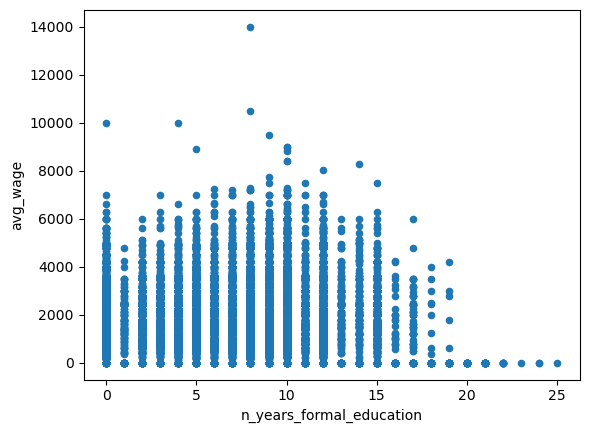

In [43]:
workforce.plot.scatter('n_years_formal_education', 'avg_wage')

In [59]:
workforce.groupby('current_attendance_educational_inst').apply(lambda x: (x['weekly_self_employed_earnings'] * x[MULT]).sum() / x[MULT].sum()).sort_values()

current_attendance_educational_inst
11    -16.433846
43     -5.196954
41      0.000000
40      0.000000
39      0.000000
36      0.000000
33      0.000000
31      0.459085
25      1.550606
13      1.743561
28      2.300280
02      6.870200
26      7.844803
12      9.409082
32     10.922696
15     11.080783
27     11.323859
34     11.879651
05     11.917611
14     12.421472
04     13.803333
29     14.688221
       17.012688
42     17.050182
03     17.369030
24     17.739027
30     27.089276
01     28.715097
35     36.383999
37     50.002399
38    635.878878
dtype: float64

In [61]:
workforce.groupby('current_attendance_educational_inst').apply(lambda x: (x['weekly_salaried_earnings'] * x[MULT]).sum() / x[MULT].sum()).sort_values()

current_attendance_educational_inst
36   -1066.646293
01     -31.274134
32     -12.787632
24     -12.628454
34     -11.931018
02      -8.825222
04      -1.933937
14      -0.008181
28       0.000000
41       0.000000
40       0.000000
39       0.000000
38       0.000000
33       0.000000
27       0.080659
05       1.436475
         2.106112
25       2.922391
26       3.254098
31       4.324774
15       5.411297
37       5.862381
12       7.761610
03       8.205885
42      10.397702
13      18.550339
29      20.628280
11      23.031732
30      35.379393
35      72.390147
43     103.535684
dtype: float64

In [ ]:
def weighted_average_earnings(df):
    """
    Calculates the average weekly earnings for each education level,
    weighted by the multiplier.

    Args:
        df (pd.DataFrame): DataFrame with columns 'weekly earnings',
                           'education', and 'multiplier'.

    Returns:
        pd.Series: Series with education levels as index and
                   weighted average weekly earnings as values.
                   Returns an empty Series if the input DataFrame is empty
                   or does not contain the required columns.
    """
    if df.empty or not all(col in df.columns for col in ['weekly earnings', 'education', 'multiplier']):
        return pd.Series()

    # Calculate the weighted earnings for each row
    df['weighted_earnings'] = df['weekly earnings'] * df['multiplier']

    # Calculate the sum of weighted earnings and the sum of multipliers for each education level
    grouped = df.groupby('education').agg(
        sum_weighted_earnings=('weighted_earnings', 'sum'),
        sum_multiplier=('multiplier', 'sum')
    )

    # Calculate the weighted average weekly earnings
    grouped['average_weekly_earnings'] = grouped['sum_weighted_earnings'] / grouped['sum_multiplier']

    return grouped['average_weekly_earnings']